<a href="https://colab.research.google.com/github/pdhSantana/ML_projects/blob/main/credit_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [3]:
dataset_credit = pd.read_csv("https://github.com/ybifoundation/Dataset/raw/main/Credit%20Default.csv")

In [4]:
dataset_credit

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1
...,...,...,...,...,...
1995,59221.04487,48.518179,1926.729397,0.032535,0
1996,69516.12757,23.162104,3503.176156,0.050394,0
1997,44311.44926,28.017167,5522.786693,0.124636,1
1998,43756.05660,63.971796,1622.722598,0.037086,0


In [5]:
dataset_credit.isnull().sum()

,0
Income,0
Age,0
Loan,0
Loan to Income,0
Default,0


In [6]:
dataset_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2000 non-null   float64
 1   Age             2000 non-null   float64
 2   Loan            2000 non-null   float64
 3   Loan to Income  2000 non-null   float64
 4   Default         2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.3 KB


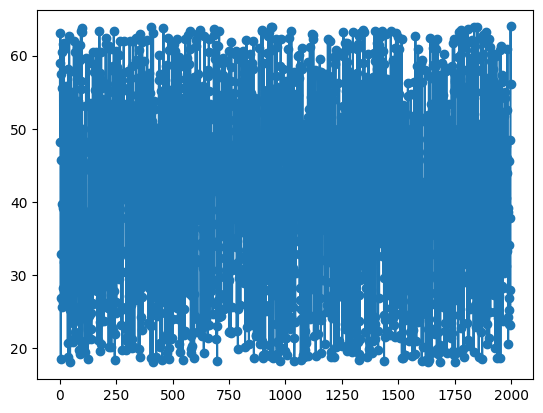

In [7]:
plt.plot(dataset_credit['Age'], marker ='o',linestyle = '-')

Vamos agora fazer uma análise breve do próximo passo dado que o dataset já está para submete-lo a algum modelo de classificação.
Foi observado que a base de dados é uma tanto pequena em relação a parametros de ánalise e elas têm relação direta entre si. Desse modo, podemos descartar modelos que consideram a idependência entre os parametros. Observando também que saída é binária podemos utilizar uma rede neural com uma função sigmoid na saída para a resolução de problema e de maneira mais completa fazer também uma regressão logistica de comparar os resultados.



**Utilização de rede neural com PyTorch**


In [8]:
import torch.nn as nn
import torch

In [9]:
np.random.seed(123)
torch.manual_seed

<function torch.random.manual_seed(seed) -> torch._C.Generator>

In [10]:
x = dataset_credit.drop(columns = ['Default'])
y = dataset_credit['Default']

# Aqui é feita a divisão entre previsores e previsões

In [11]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(x,y,test_size = 0.25)
# Divisão da base de dados entre treino (75%) e teste (25%)

In [12]:
# Quantidade de entradas = 4; quantidade de saídas = 1; (4+1)/2 = 2,5, a quantidade de neuronios será 3

classificador = nn.Sequential(
    nn.Linear(4,3),
    nn.ReLU(),
    nn.Linear(3,3),
    nn.ReLU(),
    nn.Linear(3,1),
    nn.Sigmoid()
)

criterion = nn.BCELoss() # Função para obter os erros da rede
optimizer = torch.optim.Adam(classificador.parameters(), lr = 0.001, weight_decay = 0.0001) # Função do ajuste de pesos da rede

Criada a rede neural, agora basta converter os datasets de treino para o formato de tensor, pois o pytorch requer esse formato.

In [13]:
previsores_treinamento = torch.tensor(np.array(previsores_treinamento), dtype=torch.float)
classe_treinamento = torch.tensor(np.array(classe_treinamento), dtype = torch.float)

dataset_treinamento = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)

In [14]:
train_loader = torch.utils.data.DataLoader(dataset_treinamento, batch_size= 10, shuffle=True)

In [15]:
for epoch in range(100):
  #running_loss = 0.

  for data in train_loader:
    inputs, labels = data # Note que esses inputs são na verdade uma derivação do dos previsores treinamento
    optimizer.zero_grad() # Zera o gradiente acumulado

    outputs = classificador(inputs)
    loss = criterion(outputs.squeeze(), labels) # Nessa parte do código é onde é feita o calculo de erro onde recebe como parametros a sáida esperada(labels) e output da rede
    loss.backward() # Volta ao começo da rede
    optimizer.step() # Ajuste de pesos propriamente dito



In [16]:
classificador.eval() # Encerrando o modo de treimo e começando o modo de teste

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=3, bias=True)
  (3): ReLU()
  (4): Linear(in_features=3, out_features=1, bias=True)
  (5): Sigmoid()
)

In [82]:
previsores_teste = torch.tensor(np.array(previsores_teste), dtype=torch.float)

In [83]:
previsoes = classificador(previsores_teste)

In [84]:
previsoes

tensor([[3.5917e-01],
        [0.0000e+00],
        [1.1255e-02],
        [5.3055e-31],
        [3.4575e-37],
        [3.5917e-01],
        [3.5917e-01],
        [3.5917e-01],
        [3.5917e-01],
        [3.5917e-01],
        [5.9349e-09],
        [1.5646e-22],
        [6.0227e-04],
        [3.5917e-01],
        [3.5917e-01],
        [1.0578e-17],
        [3.5917e-01],
        [3.5917e-01],
        [3.5917e-01],
        [3.5917e-01],
        [6.9599e-20],
        [3.5917e-01],
        [4.1005e-08],
        [6.7694e-21],
        [8.4481e-03],
        [4.4795e-10],
        [6.6986e-06],
        [0.0000e+00],
        [3.5917e-01],
        [3.1406e-13],
        [2.1772e-11],
        [9.1993e-16],
        [4.0308e-19],
        [3.5917e-01],
        [1.6160e-13],
        [3.5917e-01],
        [3.5917e-01],
        [3.5917e-01],
        [1.0973e-08],
        [3.5917e-01],
        [8.5430e-29],
        [3.0999e-10],
        [4.4967e-08],
        [0.0000e+00],
        [3.5917e-01],
        [1

Como no dataset é usado 1 para a inadimplência e 0 para não inadiplencia, para um banco cujo o o objetivo é evitar tomar calotes e não necessariamente acertar em quem irá ser ou não inadimplente. Podemos ser um pouco mais conservadores e considerar somente aquele que estão mais perto do 0, não necessariamente 50%

In [68]:
previsoes = np.array(previsoes)
classe_teste = np.array(classe_teste)

In [69]:
classe_teste

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [85]:
previsoes = (previsoes > 0.4)

In [86]:
previsoes

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False

In [87]:
acuracia = accuracy_score(classe_teste, previsoes)

In [88]:
acuracia

0.834

In [89]:
matriz = confusion_matrix(classe_teste, previsoes)

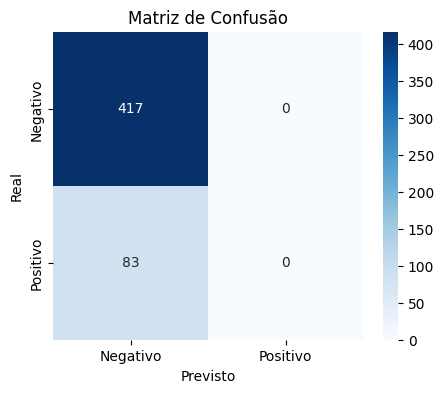

In [91]:
plt.figure(figsize=(5, 4))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

Com esse resultados ficou evidente que não ficou boa a forma da qual foi feita. A rede ficou 'viciada' em  em dar 0, ou proximo disso. Iremos agora experimentar outras abordagens.

A escolhida por mim será uma regressão com XGBoost

In [94]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [98]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2025) # Dividiremos do mesmo tamanho usado na NN

In [99]:
# Criar o modelo XGBoost para regressão
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3)

# Treinar o modelo
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [102]:
y_pred = model.predict(X_test)

# Calcular o erro médio quadrático (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.06


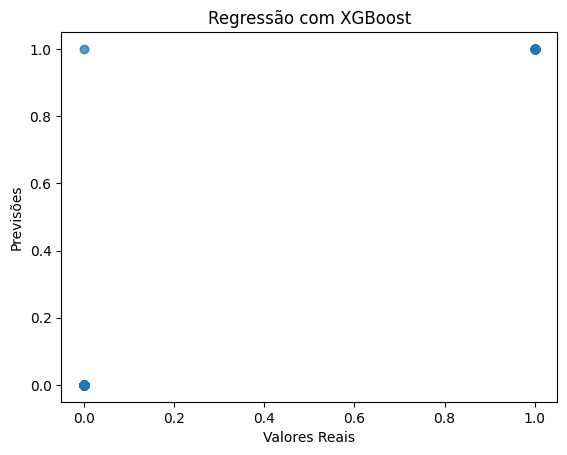

In [103]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Regressão com XGBoost")
plt.show()

Usando o XGBoost o erro foi praticamente para 0 !!!
O intuito do meu experimento era documentar e comparar o desempenho de uma rede neural simples com um modelo de classificação diferente.
A conclusão principal que podemos tirar desse pequeno experimento é que nem sempre uma Rede Neural vai ser a melhor saída para o seu problema. É necessária a avaliação de outros modelos de classificação antes de partir logo para uma NN.
